# Feature Extraction

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Final_Dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0,US,179886,RY01SAV7HZ8QO,B00NTI0CQ2,667358431,Aketek 1080P LED Protable Projector HD PC AV V...,Home Entertainment,4,0,0,N,Y,good enough for my purpose,not the best picture quality but surely suitab...,2015-08-31
1,1,1,US,37293769,R1XX8SDGJ4MZ4L,B00BUCLVZU,621695622,TiVo Mini with IR Remote (Old Version),Home Entertainment,5,0,0,N,N,Tell the Cable Company to Keep their Boxes!,Not only do my TiVo Minis replace the boxes th...,2015-08-31
2,2,2,US,8332121,R149Q3B5L33NN5,B00RBX9D5W,143071132,Apple TV MD199LL/A Bundle including remote and...,Home Entertainment,5,0,0,N,Y,Works perfectly!,Works perfectly! Very user friendly!,2015-08-31
3,3,3,US,47054962,R2ZVD69Z6KPJ4O,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,0,2,N,Y,It doesn't work. Each time I try to use ...,"It doesn't work. Each time I try to use it, th...",2015-08-31
4,4,4,US,23413911,R1DIKG2G33ZLNP,B0037UCTXG,909557698,Generic DVI-I Dual-Link (M) to 15-Pin VGA (F) ...,Home Entertainment,4,0,0,N,Y,As pictured,I received the item pictured. I am unsure why...,2015-08-31


In [4]:
df.isnull().sum().sum()

0

In [97]:
ptit = df['product_title']
ptit

0         Aketek 1080P LED Protable Projector HD PC AV V...
1                    TiVo Mini with IR Remote (Old Version)
2         Apple TV MD199LL/A Bundle including remote and...
3                    New Roku 3 6.5 Foot HDMI - Bundle - v1
4         Generic DVI-I Dual-Link (M) to 15-Pin VGA (F) ...
                                ...                        
705467                           Toshiba SD-3109 DVD Player
705468                Panasonic DVD-L50 Portable DVD Player
705469                Panasonic DVD-L50 Portable DVD Player
705470                             JVC XV-D701BK DVD Player
705471                       1 In 21 - A Tupac Shakur Story
Name: product_title, Length: 705472, dtype: object

In [23]:
cid = df['customer_id']
cid = Remove(cid)
len(cid)

609752

In [22]:
def Remove(duplicate): 
    return list(dict.fromkeys(duplicate))

In [99]:
fptit = Remove(ptit)
fptit

['Aketek 1080P LED Protable Projector HD PC AV VGA USB HDMI(Black)',
 'TiVo Mini with IR Remote (Old Version)',
 'Apple TV MD199LL/A Bundle including remote and High-Speed HDMI Cable (6 Feet) (Current Version) (Certified Refurbished)',
 'New Roku 3 6.5 Foot HDMI - Bundle - v1',
 'Generic DVI-I Dual-Link (M) to 15-Pin VGA (F) Adapter',
 'Samsung 3D LED HDTV (Silver)',
 'Jiake Wireless Bluetooth A2DP Stereo Music Headset Universal Vibration Neckband Style HBS-700 Earphone for Mobile Phones / Samsung Galaxy S4 S5 Note 2 3 / Lg G2 Pro / HTC ONE M7 M8 / Moto X G / Google Nexus 4 5 / Nokia Lumia 1520 1020 /Sony Xperia Z2 Z1 L39h / Iphone 5s 5c / Ipad Air (black)',
 '3pcs/lot 3in1 3ft 6ft 2m 10ft Extra Long Noodle Flat USB Charger Cable Cords for Iphone 4 4s Ipod Touch 4 Nano 6 (hotpink)',
 'Matricom G-Box Q² Android TV Streaming Media Mini PC [2GB/16GB/4K] Quad/Octo Core',
 'VIZIO S2920W-C0B 29" 2.0 High Definition Sound Bar with Bluetooth (Refurbished)',
 'Hitachi 49" Class 1080p LED HDTV -

In [100]:
brands = []

In [101]:
for tit in fptit:
    #tit.split()[0])# != None:
    brands.append(tit.split()[0])
    #else:
     #   brands.append(tit.split()[1])

In [102]:
brands

['Aketek',
 'TiVo',
 'Apple',
 'New',
 'Generic',
 'Samsung',
 'Jiake',
 '3pcs/lot',
 'Matricom',
 'VIZIO',
 'Hitachi',
 'Sony',
 'Sylvania',
 'Roku',
 'LG',
 'LG',
 'SquareTrade',
 'Cambridge',
 'Roku',
 'VIZIO',
 'Google',
 'HOTER',
 'Samsung',
 'Samsung',
 'Epson',
 'New',
 'Standard',
 'Samsung',
 'VIZIO',
 'LG',
 'Portable,',
 'Mediasonic',
 'Samsung',
 'VIZIO',
 'LG',
 'RCA',
 'Compact',
 'Samsung',
 'BenQ',
 'Philips',
 'VIZIO',
 'Tablo',
 'Roku',
 'Jadoo',
 'Samsung',
 'Samsung',
 'Panasonic',
 'iPad',
 'VIZIO',
 'Roku',
 'Audiovox',
 'Samsung',
 'AGPtek®',
 'Westinghouse',
 'Axess',
 'TiVo',
 'Samsung',
 'TCL',
 'Sylvania',
 'Sony',
 'Vivitek',
 'VIZIO',
 'Roku',
 'ViewSonic',
 '99digitals®',
 'LG',
 'Sony',
 'Epson',
 'LG',
 'VIZIO',
 'Samsung',
 'Samsung',
 'Ematic',
 'Sony',
 'Warm-Dog',
 'LG',
 'TVPAD',
 'Funai',
 'Apple',
 'Samsung',
 'JVC',
 'Pyle',
 'RCA',
 'Cell',
 'Sony',
 'Samsung',
 'PINATA',
 'Sling',
 'RioRand',
 'Optoma',
 'VIZIO',
 'WHY',
 'Nikon',
 'Axess',
 'T

In [103]:
ln = [0]*(len(brands))
ln

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [104]:
k = 0
for i in b:
    for j in ptit:
        if str(j).find(i):
            ln[k] = ln[k]+1
            break
    k = k+1

1


# Getting started with Data

In [7]:
items_df = pd.DataFrame(data=df, columns=['product_id', 'product_title', 'product_parent'])
items_df

,product_id,product_title,product_parent
0,B00NTI0CQ2,Aketek 1080P LED Protable Projector HD PC AV V...,667358431
1,B00BUCLVZU,TiVo Mini with IR Remote (Old Version),621695622
2,B00RBX9D5W,Apple TV MD199LL/A Bundle including remote and...,143071132
3,B00UJ3IULO,New Roku 3 6.5 Foot HDMI - Bundle - v1,567816707
4,B0037UCTXG,Generic DVI-I Dual-Link (M) to 15-Pin VGA (F) ...,909557698
...,...,...,...
705467,B00000JHWX,Toshiba SD-3109 DVD Player,803817385
705468,B00000JFMK,Panasonic DVD-L50 Portable DVD Player,893744918
705469,B00000JFMK,Panasonic DVD-L50 Portable DVD Player,893744918
705470,B00000J4GI,JVC XV-D701BK DVD Player,150762671


In [8]:
ratings_df = pd.DataFrame(data=df, columns=['customer_id', 'product_id', 'star_rating', 'review_date'])
ratings_df

,customer_id,product_id,star_rating,review_date
0,179886,B00NTI0CQ2,4,2015-08-31
1,37293769,B00BUCLVZU,5,2015-08-31
2,8332121,B00RBX9D5W,5,2015-08-31
3,47054962,B00UJ3IULO,1,2015-08-31
4,23413911,B0037UCTXG,4,2015-08-31
...,...,...,...,...
705467,51385642,B00000JHWX,5,1999-06-14
705468,53048056,B00000JFMK,5,1999-06-14
705469,52316356,B00000JFMK,4,1999-06-12
705470,51775511,B00000J4GI,3,1999-06-09


In [11]:
items_df.sort_values('product_id', inplace=True)
items_df.drop_duplicates(subset='product_id', keep=False, inplace=True)
items_df

,product_id,product_title,product_parent
677365,0312174349,Puritanism and Revolution: Studies in Interpre...,994483089
421274,0439542804,"Lego Island 2: The Brickster""s Revenge",628915434
302150,0594482127,NOOK HD 7 inch Protective 360 Stand Cover Black,768464148
62480,0594545811,Barnes & Noble Nook HD Groovy Stand in Violet ...,193569861
183942,0743608917,Boca Grande to Marco Island including Okeechob...,240599570
...,...,...,...
1663,B014FZ1FNG,Hll Mart's Finco True High Definition 1080P Wi...,670301471
1636,B014G0R7V4,Hll Mart's Finco True High Definition 1080P Wi...,600739173
2120,B014IARXZC,Fire Stick with 15.0 Kodi Ultimate Package,237050322
1483,B014JQ57XK,Fire Tv Stick,351900766


In [18]:
items_df['items_index'] = items_df.index
items_df.head()

,product_id,product_title,product_parent,items_index
0,0312174349,Puritanism and Revolution: Studies in Interpre...,994483089,0
1,0439542804,"Lego Island 2: The Brickster""s Revenge",628915434,1
2,0594482127,NOOK HD 7 inch Protective 360 Stand Cover Black,768464148,2
3,0594545811,Barnes & Noble Nook HD Groovy Stand in Violet ...,193569861,3
4,0743608917,Boca Grande to Marco Island including Okeechob...,240599570,4


In [19]:
merged_df = items_df.merge(ratings_df, on='product_id')
merged_df.head()

,product_id,product_title,product_parent,items_index,customer_id,star_rating,review_date
0,0312174349,Puritanism and Revolution: Studies in Interpre...,994483089,0,18508525,3,2006-04-12
1,0439542804,"Lego Island 2: The Brickster""s Revenge",628915434,1,11440570,5,2013-02-10
2,0594482127,NOOK HD 7 inch Protective 360 Stand Cover Black,768464148,2,11060239,4,2014-01-20
3,0594545811,Barnes & Noble Nook HD Groovy Stand in Violet ...,193569861,3,2493179,5,2015-04-30
4,0743608917,Boca Grande to Marco Island including Okeechob...,240599570,4,34194426,4,2014-10-23


In [29]:
merged_df = merged_df.drop(columns='product_parent')
merged_df.head()

,product_id,items_index,customer_id,star_rating
0,0312174349,0,18508525,3
1,0439542804,1,11440570,5
2,0594482127,2,11060239,4
3,0594545811,3,2493179,5
4,0743608917,4,34194426,4


In [31]:
len(merged_df)

22510

In [30]:
group_customer = merged_df.groupby('customer_id')
group_customer.first().head()

,product_id,items_index,star_rating
customer_id,,,
10033,B00FC9Z6B2,17552,1
12581,B00HIDV6I2,18710,1
17861,B003VWG6IE,6894,5
18234,B00CO022LE,16075,5
19896,B00A4DFTBS,14257,4


In [32]:
len(group_customer)

21988

In [33]:
#No of customers = 60952

trainCustomers = 20000 # ~90% of group_customer

trainX = []

for customer_id, current_customer in group_customer:
    temp = [0]*len(items_df)
    for num, item in current_customer.iterrows():
        temp[item['items_index']] = item['star_rating']/5.0
    trainX.append(temp)
    if trainCustomers is 0:
        break
    trainCustomers -= 1

In [34]:
hiddenLayers = 20
visibleLayers = len(items_df)
vb = tf.placeholder("float", [visibleLayers])
hb = tf.placeholder("float", [hiddenLayers])
W = tf.placeholder("float", [visibleLayers, hiddenLayers])

In [35]:
v0 = tf.placeholder("float", [None, visibleLayers])
_h0 = tf.nn.sigmoid(tf.matmul(v0,W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [40]:
alpha = 1.0 #Learning Rate

w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

CD = (w_pos_grad - w_neg_grad)/tf.to_float(tf.shape(v0)[0])

update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [37]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [41]:
cur_w = np.zeros([visibleLayers, hiddenLayers], np.float32)
cur_vb = np.zeros([visibleLayers], np.float32)
cur_hb = np.zeros([hiddenLayers], np.float32)

prv_w = np.zeros([visibleLayers, hiddenLayers], np.float32)
prv_vb = np.zeros([visibleLayers], np.float32)
prv_hb = np.zeros([hiddenLayers], np.float32)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

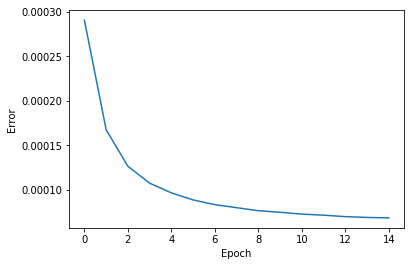

In [43]:
epochs = 15
batchsize = 100
errors = []

for i in range(epochs):
    for start, end in zip( range(0, len(trainX), batchsize), range(batchsize, len(trainX), batchsize)):
        batch = trainX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trainX, W: cur_w, vb: cur_vb, hb: cur_hb}))
plt.plot(errors)
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

# Testing Recommendation

In [75]:
inputCustomer = [trainX[100]]

In [77]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputCustomer, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

In [78]:
items_df["Recommendation score"] = rec[0]
items_df.sort_values("Recommendation score", inplace=True)

In [79]:
items_df.tail()

,product_id,product_title,product_parent,items_index,Recommendation score
9494,B0058LIWEC,"Gizmo Dorks Hard Shell Case (Black), Silicone ...",352306585,9494,0.000134
11184,B007EBKMBU,25 Foot F Quick Plug Coax to F Quick Plug Coax...,397585955,11184,0.000135
13447,B0099ZX1EE,NFL Seattle Seahawks iPhone 5/5s/SE Skin - Sea...,308517761,13447,0.000137
9114,B0050NBR90,Amzer Silicone Skin Jelly Case - Orange,608010495,9114,0.000143
6788,B003UE4JSC,"Your Cable Store 1/4"" (6.3mm) Stereo Headphone...",445502988,6788,0.000154


In [51]:
errors

[0.00029036158,
 0.00016763694,
 0.00012660256,
 0.00010770347,
 9.68164e-05,
 8.889943e-05,
 8.358249e-05,
 8.020994e-05,
 7.679741e-05,
 7.506627e-05,
 7.3008174e-05,
 7.182431e-05,
 7.0156246e-05,
 6.926779e-05,
 6.872762e-05]

In [54]:
import math

In [60]:
rmse = 0
for error in errors:
    rmse += error*error
    
rmse = rmse/len(errors)
rmse = math.sqrt(rmse)
print("RMSE of this Model: %.8f" %rmse)

RMSE of this Model: 0.00011753


# Integration

In [71]:
import speech_recognition as sr
import pyaudio
import webbrowser

In [85]:
items_rec = items_df['product_title']
items_rec_list = items_rec.values.tolist()
items_rec_list

['Mental Hoop Dark Purple Faux Leather Phone Wrist Strap Lanyard',
 'GTMax 12 Items Accessories Neoprene Zipper Pouch Case Bundle kit for Acer Iconia Tab A200 A210 10.1-Inch Android Tablet Wi-Fi',
 'uxcell USB Connector 13 LEDs Flexible Gooseneck Reading Light Lamp for Laptop PC',
 '100pcs CD DVD Double Sided Cover Storage Case Plastic Bag Sleeve Envelope Holder',
 'Fonus Black Retractable 3.5mm Input Car Stereo Auxiliary AUX Jack Audio Cable Wire Adapter Connector for ZTE Merit, ZTE Engage, ZTE Chorus, ZTE Anthem 4G',
 'INOi Media Player MP670 - DVD player / HDD recorder - 250 GB',
 'Krusell Gamic Multidapt Leather Case for Sony PSP-1000',
 'uxcell Black 3.5mm Male 4 Pole Audio Speaker Connector Adapter',
 'JAVOedge Vintage Quilted Wallet Case for the Apple iPhone 5s, iPhone 5 (White/Turquoise)',
 'Hp Pavilion DM1Z-2100 Laptop LCD Screen 11.6" WXGA HD LED ( Compatible Replacement )',
 "2 x 6' 6ft Toslink Cable Cord Digital Audio S/PDIF Optical",
 'New 15.6" WXGA Glossy LED Screen For 

In [81]:
sr.Microphone.list_microphone_names()

['Microsoft Sound Mapper - Input',
 'Microphone Array (Realtek High ',
 'Microsoft Sound Mapper - Output',
 'Speaker/Headphone (Realtek High',
 'Primary Sound Capture Driver',
 'Microphone Array (Realtek High Definition Audio)',
 'Primary Sound Driver',
 'Speaker/Headphone (Realtek High Definition Audio)',
 'Speaker/Headphone (Realtek High Definition Audio)',
 'Microphone Array (Realtek High Definition Audio)',
 'Mic in at front panel (black) (Mic in at front panel (black))',
 'Stereo Mix (Realtek HD Audio Stereo input)',
 'Speakers (Realtek HD Audio output)',
 'Headphones (Realtek HD Audio 2nd output)',
 'Microphone Array (Realtek HD Audio Mic input)']

In [86]:
sr.Microphone(device_index=1)
r = sr.Recognizer()
r.energy_threshold = 2000

with sr.Microphone() as source:
    print("Hello!\nListening...")
    audio=r.listen(source)
    try:
        text=r.recognize_google(audio)
        print("You said: "+text)
        for item in items_rec_list:
            if (item.find(text) != -1):
                uri = items_df[items_df['product_title'] == item].items_df['product_id']
                print(uri)
                break
        url="https://www.amazon.com/dp/"
        search_url=url+uri
        webbrowser.open(search_url)
    except:
        print("Can't recognize")

Hello!
Listening...
You said: headphones
Can't recognize
